In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
# DUE DATE = '02/06/2023'
# HOPE YOU ENJOYED THE RIDE
# GOOD LUCK!
#    |\---/|
#    | ,_, |
#     \_`_/-..----.
#  ___/ `   ' ,""+ \  
# (__...'   __\    |`.___.';
#   (_,...'(_,.`__)/'.....+

# Regression

Regression is a statistical analysis technique used to model the relationship between a dependent variable (also known as the response or target variable) and one or more independent variables (also known as predictors or features). The goal of regression analysis is to understand and predict the value of the dependent variable based on the values of the independent variables.


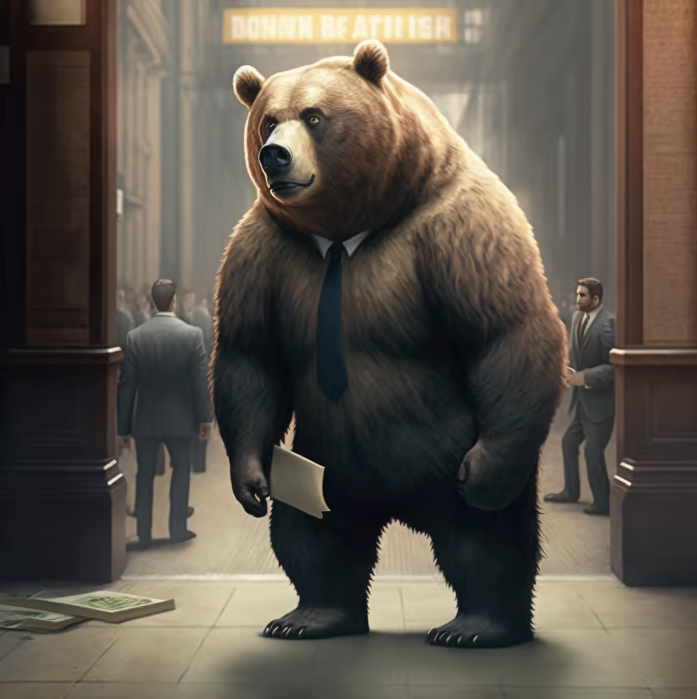
<br>
"Bear Stearns" by Midjourney

In this section, you are going to build a loan interest rate prediction model using regression.

## Data Preprocessing (9 pts)

There were apparently some researchers who were kidnapped during the survey by the Harkonnens which led to incomplete data.
** **
In this section, you are going to load the dataset and drop irrelevant column(s). 

Next, check for missing values and total number of duplicates. You will fill the missing values with the mode of the corresponding feature and print such features.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#loading the data
data = pd.read_csv('loans.csv')

data.info()

#dropping the irrelevant column
data = data.drop(columns=data.columns[0])


#check each feature for missing values and handle them
data.isnull().sum()
data = data.dropna()

data.info()


#checking num_duplicates
data.duplicated().sum()
data = data.drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      2500 non-null   int64  
 1   ID                              2499 non-null   float64
 2   Amount_Requested                2500 non-null   int64  
 3   Amount_Funded_By_Investors      2500 non-null   float64
 4   Interest_Rate                   2500 non-null   float64
 5   Loan_Length                     2499 non-null   float64
 6   Loan_Purpose                    2499 non-null   object 
 7   Debt_To_Income_Ratio            2500 non-null   float64
 8   Home_Ownership                  2500 non-null   object 
 9   Monthly_Income                  2500 non-null   float64
 10  Open_CREDIT_Lines               2500 non-null   int64  
 11  Revolving_CREDIT_Balance        2500 non-null   int64  
 12  Inquiries_in_the_Last_6_Months  25

## Exploratory Data Analysis (18 pts)

Visualize the the interest rates corresponding to different Home_Ownership and Loan_Length parameters.
*   Create a new figure with a size of (10,5).
*   On a bar plot, represent the 'Home_Ownership' column in x-axis and the 'Interest_Rate' column in y-axis.
*   Hue would be according to the Loan_Length.
* Show the plot.



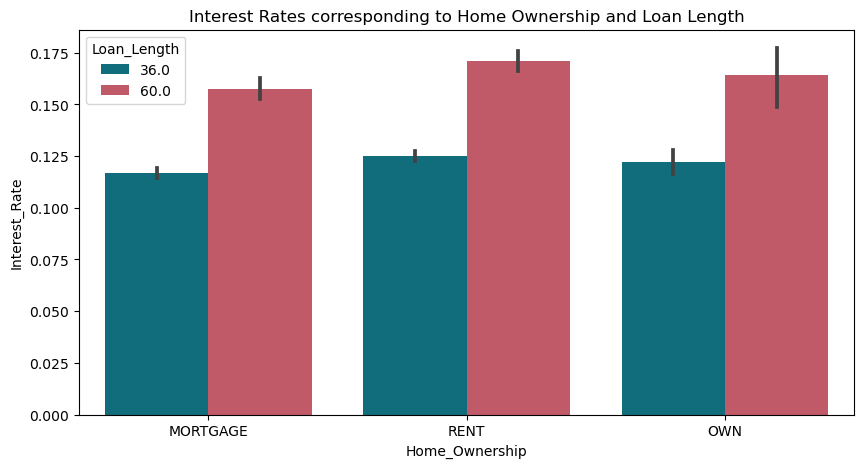

In [6]:
plt.figure(figsize=(10,5))
colors = ["#00798c", "#d1495b", "#edae49", "#66a182", "#1a508b"] # Replace these with your preferred colors
sns.barplot(x='Home_Ownership', y='Interest_Rate', hue='Loan_Length', data=data, palette=colors)
plt.title('Interest Rates corresponding to Home Ownership and Loan Length')
plt.show()


Create a pie plot to demonstrate the share of distribution in home ownership.

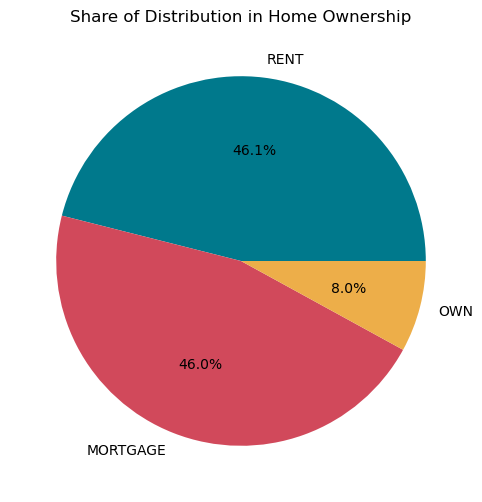

In [8]:
home_ownership_counts = data['Home_Ownership'].value_counts()

# Define a color palette
colors = ["#00798c", "#d1495b", "#edae49", "#66a182", "#1a508b"] 

# Repeat the color list if there are more categories than colors
colors = colors * (len(home_ownership_counts) // len(colors) + 1)

plt.figure(figsize=(10, 6))
plt.pie(home_ownership_counts, labels=home_ownership_counts.index, autopct='%1.1f%%', colors=colors[:len(home_ownership_counts)])
plt.title('Share of Distribution in Home Ownership')
plt.show()


Check the data types for each feature and convert the categorical features into numerical values.

**Hint:** You can use the "get_dummies" function of Pandas library.

In [9]:
data.dtypes

ID                                float64
Amount_Requested                    int64
Amount_Funded_By_Investors        float64
Interest_Rate                     float64
Loan_Length                       float64
Loan_Purpose                       object
Debt_To_Income_Ratio              float64
Home_Ownership                     object
Monthly_Income                    float64
Open_CREDIT_Lines                   int64
Revolving_CREDIT_Balance            int64
Inquiries_in_the_Last_6_Months      int64
Employment_Length                 float64
dtype: object

In [14]:

# Convert categorical variables into dummy/indicator variables (i.e. one-hot encoding).
data_encoded = pd.get_dummies(data)
data_encoded.dtypes


ID                                 float64
Amount_Requested                     int64
Amount_Funded_By_Investors         float64
Interest_Rate                      float64
Loan_Length                        float64
Debt_To_Income_Ratio               float64
Monthly_Income                     float64
Open_CREDIT_Lines                    int64
Revolving_CREDIT_Balance             int64
Inquiries_in_the_Last_6_Months       int64
Employment_Length                  float64
Loan_Purpose_Personal                uint8
Loan_Purpose_credit_card             uint8
Loan_Purpose_debt_consolidation      uint8
Loan_Purpose_house                   uint8
Loan_Purpose_major_purchase          uint8
Loan_Purpose_other                   uint8
Loan_Purpose_small_business          uint8
Home_Ownership_MORTGAGE              uint8
Home_Ownership_OWN                   uint8
Home_Ownership_RENT                  uint8
dtype: object

Create a heatmap to present the relationships between different features.

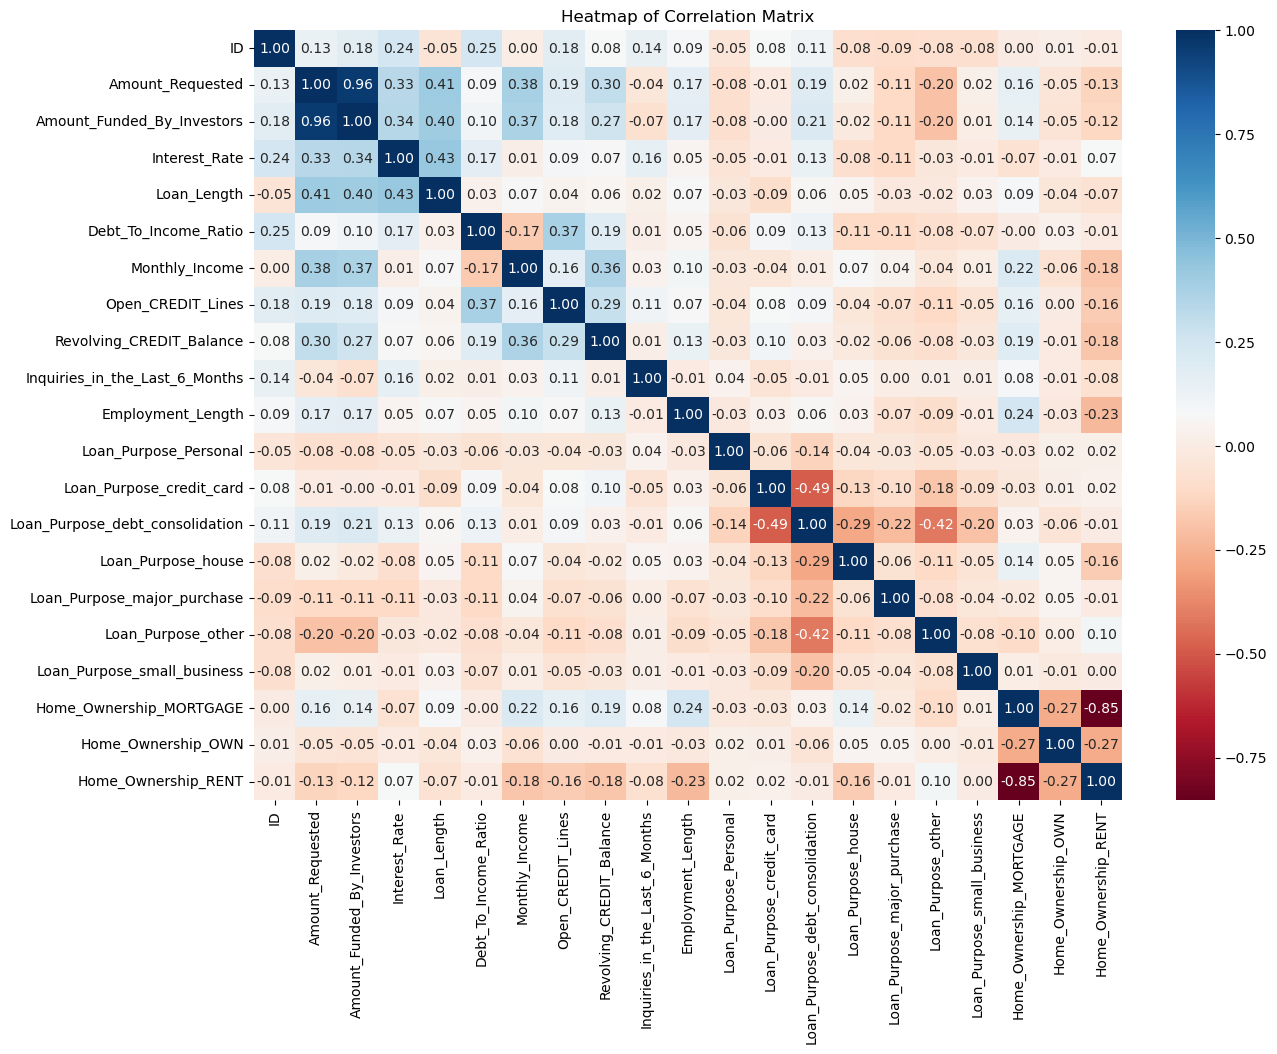

In [16]:

# Compute pairwise correlation of columns
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='RdBu')
plt.title('Heatmap of Correlation Matrix')
plt.show()


## Model Evaluation (15 pts)

Separate the data into features and labels.



In [17]:
# separate features and labels
features = data_encoded.drop('Interest_Rate', axis=1)
labels = data_encoded['Interest_Rate']


Split the data into training and test data. You could use a ratio of 80/20.

In [18]:
from sklearn.model_selection import train_test_split

# split the data into training and test sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)


Train a linear regression model on and report the MSE and R2 score on the training data.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train a linear regression model
model = LinearRegression()
model.fit(features_train, labels_train)

# Predict on the training data
labels_pred_train = model.predict(features_train)

# Calculate the Mean Squared Error (MSE) on training data
mse_train = mean_squared_error(labels_train, labels_pred_train)

# Calculate the R2 score on training data
r2_train = r2_score(labels_train, labels_pred_train)

# Print the MSE and R2 score on training data
print("Mean Squared Error (MSE) on training data: ", mse_train)
print("R2 score on training data: ", r2_train)


Mean Squared Error (MSE) on training data:  0.0011492932511014348
R2 score on training data:  0.3219793263058478


Run the model on test data and report the MSE and R2 score.

In [21]:
# Predict on the test data
labels_pred_test = model.predict(features_test)

# Calculate the Mean Squared Error (MSE) on test data
mse_test = mean_squared_error(labels_test, labels_pred_test)

# Calculate the R2 score on test data
r2_test = r2_score(labels_test, labels_pred_test)

# Print the MSE and R2 score on test data
print("Mean Squared Error (MSE) on test data: ", mse_test)
print("R2 score on test data: ", r2_test)


Mean Squared Error (MSE) on test data:  0.001131581728219232
R2 score on test data:  0.32400983403260397


# Experiment with Different Regression Models (8 pts)

Experiment with at least one alternative regression model.

Report the results in comparison with those of the linear regressor.

In [26]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression

# Retrieve linear regressor metrics to print later on
linear_r2 = r2_test
linear_mse = mse_test

# Scaling the features
sc = StandardScaler()
features_train_scaled = sc.fit_transform(features_train)
features_test_scaled = sc.transform(features_test)

# SVR
svr = SVR(kernel='rbf')
svr.fit(features_train_scaled, labels_train)
svr_pred = svr.predict(features_test_scaled)

svr_r2 = r2_score(labels_test, svr_pred)
svr_mse = mean_squared_error(labels_test, svr_pred)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
features_train_poly = poly_features.fit_transform(features_train)
features_test_poly = poly_features.transform(features_test)

poly_regressor = LinearRegression()
poly_regressor.fit(features_train_poly, labels_train)
poly_pred = poly_regressor.predict(features_test_poly)

poly_r2 = r2_score(labels_test, poly_pred)
poly_mse = mean_squared_error(labels_test, poly_pred)

# Print the results
print(f"Linear Regressor R2 score: {linear_r2}")
print(f"Linear Regressor MSE: {linear_mse}")
print(f"SVR R2 score: {svr_r2}")
print(f"SVR MSE: {svr_mse}")
print(f"Polynomial Regression R2 score: {poly_r2}")
print(f"Polynomial Regression MSE: {poly_mse}")


Linear Regressor R2 score: 0.32400983403260397
Linear Regressor MSE: 0.001131581728219232
SVR R2 score: -0.2663578619232736
SVR MSE: 0.002119834710743802
Polynomial Regression R2 score: 0.3262782399710892
Polynomial Regression MSE: 0.0011277845032869724


# Classification

Classification is a fundamental task in machine learning that is often used in conjunction with regression. The goal of a classification task is to train a machine learning algorithm to accurately assign a given set of features to the correct class. There are various types of classification tasks, such as image classification, text classification, and audio classification etc.

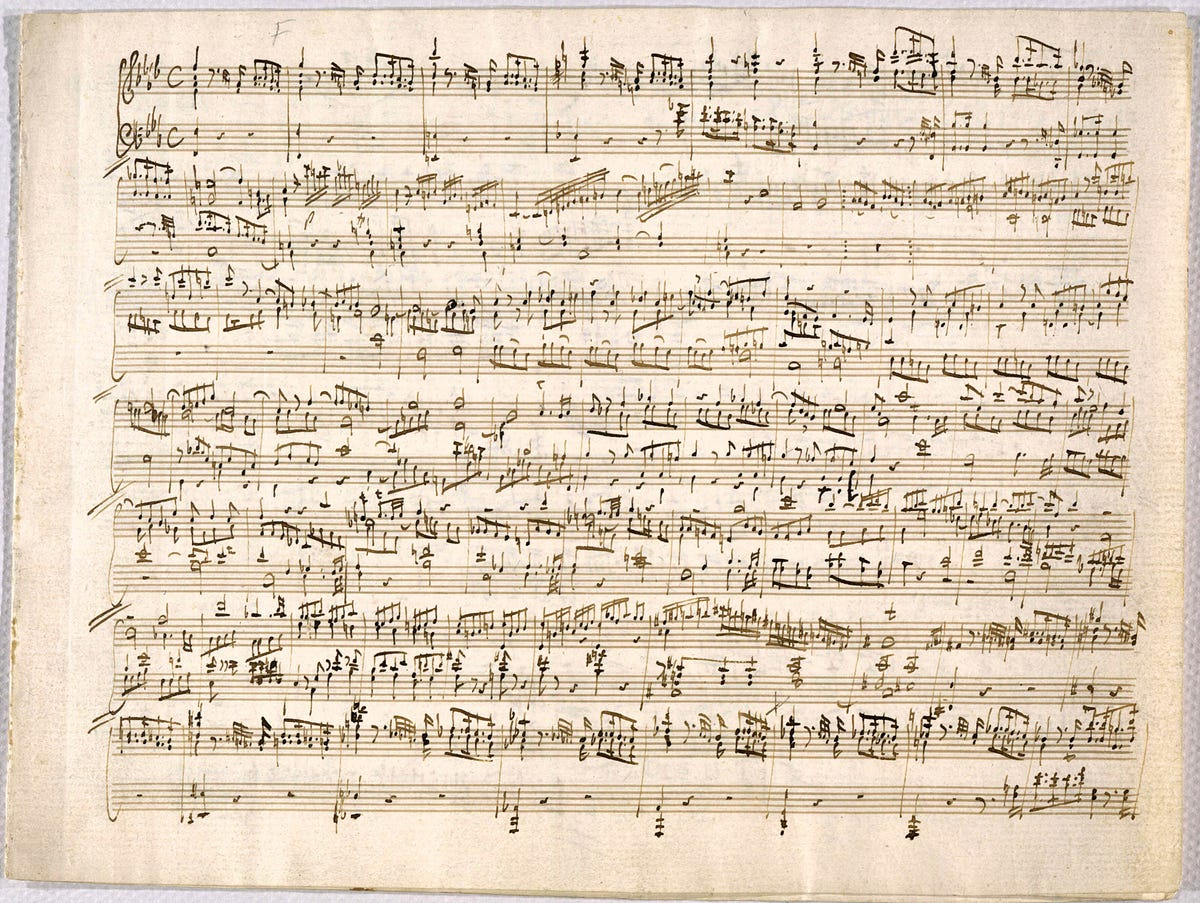

In this section, we are going to build and train a model which can figure out the composer from the notes and velocities that are in the song. These values are stored inside midi files. 

In [38]:
!pip install pretty_midi
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/230.1 MB 311.9 kB/s eta 0:12:13^C
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/230.1 MB 311.9 kB/s eta 0:12:13
ERROR: Operation cancelled by user


In [39]:
import pretty_midi
import numpy as np
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'tensorflow'

Do not delete this function. We will use this function to extract the values we have talked before.

In [40]:
def extractNotesAndVelocities(path):
    # Reading the midi file
    midi_data = pretty_midi.PrettyMIDI(path)
    
    notes = np.array([])
    velocities = np.array([])

    # Extracting pitch and velocity values of each song 
    for instrument in midi_data.instruments:
      notes = np.append(notes, np.array([note.pitch for note in instrument.notes]))
      velocities = np.append(velocities, np.array([note.velocity for note in instrument.notes]))

    return notes, velocities

## Data Loading (10 pts)

Read the MIDI files in all the folders in the given root directory and store them in a dictionary. There are some corrupted files inside the folders so don't forget to write a code to bypass that. You can use the extractNotesAndVelocities function above to extract the needed values. (10 pts)

In [47]:
def createComposersDictionary(root_path):
    composers = {}

    # list all the directories in the root_path
    composer_dirs = [dir for dir in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, dir))]

    # loop over each directory (each directory is a composer)
    for composer_dir in composer_dirs:
        # initialize an empty list for this composer
        composers[composer_dir] = []

        # list all the files in this directory
        files = os.listdir(os.path.join(root_path, composer_dir))

        # loop over each file
        for file in files:
            try:
                # extract the notes and velocities using the given function
                notes, velocities = extractNotesAndVelocities(os.path.join(root_path, composer_dir, file))
                
                # add the notes and velocities to the composers dictionary
                composers[composer_dir].append((notes, velocities))
                
            except Exception as e:
                # if an error occurred (the file is corrupted), print the filename and continue with the next file
                print(f"Corrupted file: {file}")

    return composers

path = "./musicnet_midis/"
composers = createComposersDictionary(path)


Corrupted file: 2310_prelude15.mid
Corrupted file: 2292_prelude19.mid
Corrupted file: 2227_fugue6.mid
Corrupted file: 2211_fugue12.mid
Corrupted file: 2305_prelude14.mid
Corrupted file: 2230_prelude20.mid
Corrupted file: 2194_prelude13.mid


## Mapping Name to Index (5 pts)

Since the machine learning solutions only understand numeric values we need to create a mapping from names of the composers to numbers.(5 pts)

In [48]:
composer_name_to_index = {composer: index for index, composer in enumerate(composers.keys())}


In [49]:
composer_name_to_index

{'Mozart': 0, 'Beethoven': 1, 'Schubert': 2, 'Bach': 3}

## Data Preprocessing (10 pts)

The machine learning algorithms work by using fixed sized inputs and outputs and songs have different numbers of notes, therefore we need to put them inside a fixed sized of vectors. Fixed size will be 400!!!

Scikit-learn only has shallow machine learning algorithms, thus you can use flatten() function to convert the numpy array of notes and velocities to 1d vector.



In [50]:
fixed_size = 400 # Fixed size of features

labels = [] # Store the labels in this list
features = [] # Store the features as 2d(number of elements, fixed size) arrays in this list
average_notes = [] # Store the average pitch of each fixed sized array in this list for visualization
average_velocities = [] # Store the average velocity of each fixed sized array in this list for visualization

for composer, notes_and_velocities in composers.items():
    for notes, velocities in notes_and_velocities:
        # Bypass the songs with less than 400 notes
        if len(notes) < fixed_size:
            continue

        # Extract then store the !!average!! notes and velocities of each 400 fixed sized vectors
        for i in range(0, len(notes), fixed_size):
            if i + fixed_size > len(notes):
                break

            average_note = np.mean(notes[i:i+fixed_size])
            average_velocity = np.mean(velocities[i:i+fixed_size])

            average_notes.append(average_note)
            average_velocities.append(average_velocity)

            # Extract then store the composer names of each 400 sized vectors
            labels.append(composer_name_to_index[composer])

            # Extract then store the features(notes and velocities) of each 400 sized vectors 
            # do not forget to flatten the array before storing
            feature = np.concatenate((notes[i:i+fixed_size], velocities[i:i+fixed_size])).flatten()
            features.append(feature)

labels = np.array(labels)
features = np.array(features)
average_notes = np.array(average_notes)
average_velocities = np.array(average_velocities)


# Data Visualization (6 pts)

Visualize the average velocity and pitch of each song(400 fixed size vector) with the composers as colors.


1.   Create figure with 16, 12 figsize
2.   Plot scatter plot using notes and velocities with labels as color
3.   Write xlabel as Notes
4.   Write ylabel as Velocities
5.   Write title as Notes vs Velocities with Labels
6.   Put colorbar
7.   Show the plot

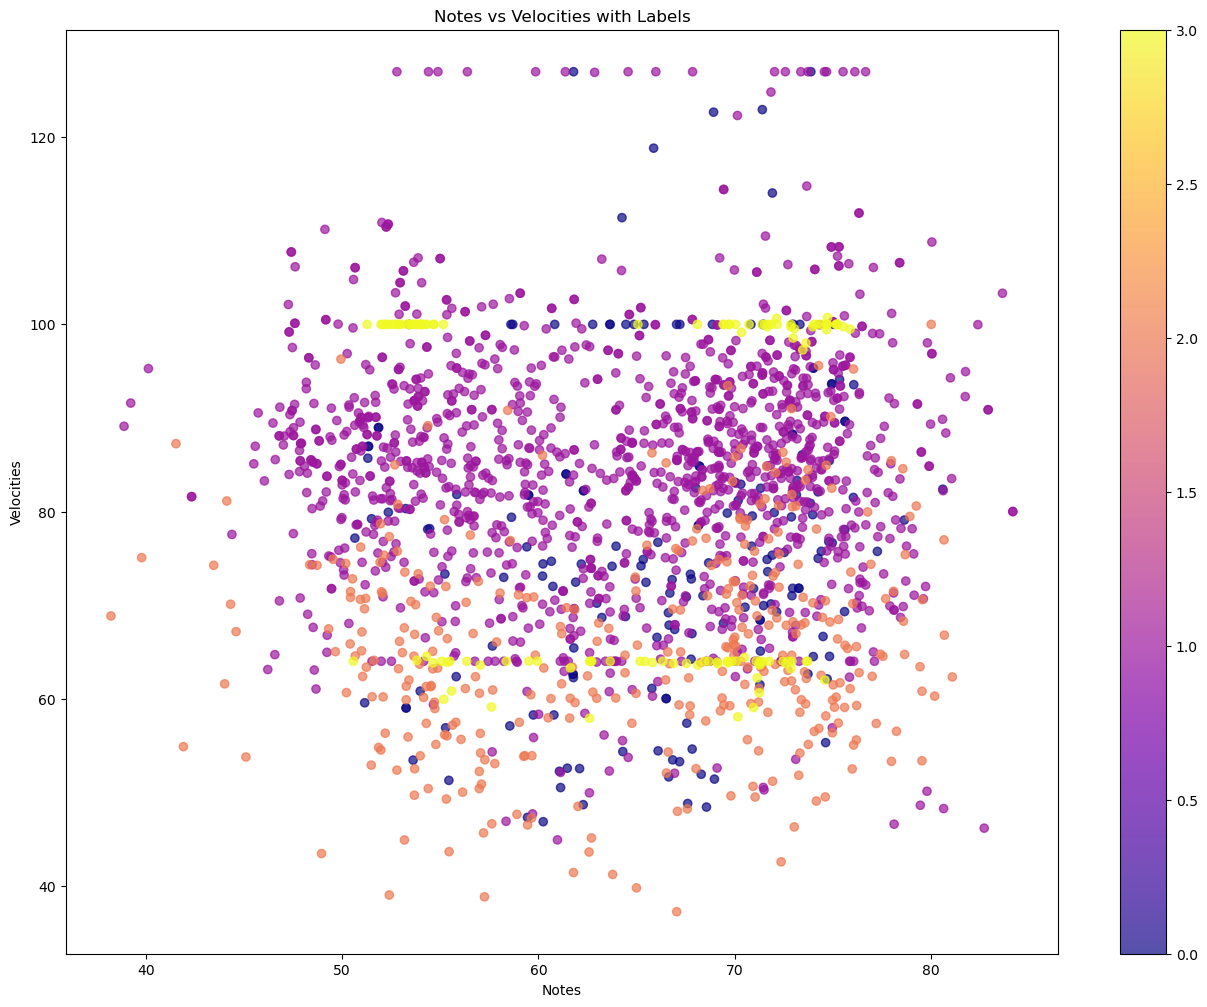

In [54]:
# Create a new figure with a size of (16, 12)
plt.figure(figsize=(16, 12))

# Create a scatter plot of average_notes vs average_velocities,
# and color each point by its label
scatter = plt.scatter(average_notes, average_velocities, c=labels, cmap='plasma', alpha=0.7)

# Label the x and y axes
plt.xlabel('Notes')
plt.ylabel('Velocities')

# Add a title to the plot
plt.title('Notes vs Velocities with Labels')

# Add a color bar to the plot
plt.colorbar(scatter)

# Show the plot
plt.show()


## Checking lengths (2 pts)

Check whether the lengths of features and labels are the same or not.(2pts)

In [56]:
# Check if the lengths of labels and features are the same
print(len(labels))
print(len(features))
if len(labels) == len(features):
    print("The lengths of labels and features are the same.")
else:
    print("The lengths of labels and features are not the same.")


1993
1993
The lengths of labels and features are the same.


## Train-test split (2 pts)

Split the features and labels into train and test datasets using sklearn with test size of 0.2(2 pts)

In [59]:
from sklearn.model_selection import train_test_split

# Split the features and labels into training and test datasets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)
print("features_train.shape: ", features_train.shape)
print("features_test.shape: ", features_test.shape)


features_train.shape:  (1594, 800)
features_test.shape:  (399, 800)


## Choosing and training a model (10 pts)

Choose a classification model and explain why it is the better choice.(8 pts)

Train the model(2pts)

In [63]:
from sklearn.tree import DecisionTreeClassifier
#dtc w 42
model = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data

model.fit(features_train, labels_train)


DecisionTreeClassifier(random_state=42)

## Model Evaluation (5 pts)

Predict on test features and use f1_score to evaluate your model.(5pts)

In [66]:
# Predict on test features and use f1_score to evaluate your model.

from sklearn.metrics import f1_score

# Predict on test features
labelsP = model.predict(features_test)
# Evaluate predictions
f1 = f1_score(labels_test, labelsP, average='macro')

# Print f1 score
print("F1 score: {:.2f}".format(f1))


F1 score: 0.64
